In [1]:
import numpy as np
from scipy import integrate
from astropy import constants as const
from astropy import units as u
import plotter as p #plotter function
import gravSolve as gs #gravity solver function
import matplotlib.pyplot as plt
#%matplotlib inline


In [2]:
#units used: AU, Msun, yr
G = const.G.to('AU**3/Msun*yr**2').value

M1 = 0.8
M2 = (233.3076*u.Mearth).to('Msun').value
M3 = M1
e = 0.0000
a = 0.110

# compute some other useful quantities
Mtot=M1+M2
mu=M1*M2/Mtot
ell=np.sqrt(G*Mtot*a*(1.0-e**2))
P=2.0*np.pi*np.sqrt(a**3/(G*Mtot))
# set initial conditions correpsonding to apoapsis
rap=a*(1.0+e)
vap=ell/rap


# positions and velocities of the two stars
a1=rap*mu/M1
a2=rap*mu/M2
v1=vap*mu/M1
v2=vap*mu/M2

The bodies will all be constant mass and the initial conditions will stay the same for star 1 and the planet. We will change the initial position of the second star to see if the orbit becomes unstable.

In [3]:
def body3(pos, p=1, ϵ=0.0001): 
    body1Pos = [a1,0,0] #(x,y,z)
    body1Velo = [0,v1,0] #(vx,vy,vz)

    body2Pos = [-a2,0,0] #(x,y,z)
    body2Velo = [0,-v2,0] #(vx,vy,vz)

    body3Pos = [pos,0,0]
    body3Velo = [0,0,0]

    mass = np.array([M1,M2, M3])
    pos = np.array([body1Pos, body2Pos, body3Pos]).flatten()
    velo = np.array([body1Velo, body2Velo, body3Velo]).flatten()
    v0 = np.array([pos, velo]).flatten()
    tarr=np.linspace(0.0, P*p, 1e3) 
    result=integrate.odeint(gs.df_Nbody,v0,tarr,args=(mass,G, ϵ)) 
    return result, tarr

To see the orbit of star 1 and the planet, star 3 will be very far away so that it does not influence the orbits of star 1 and the planet.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


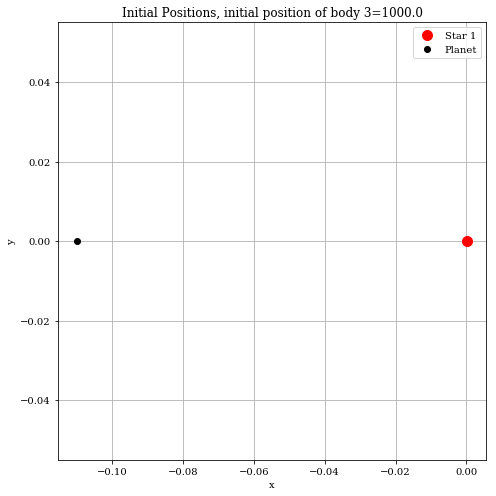

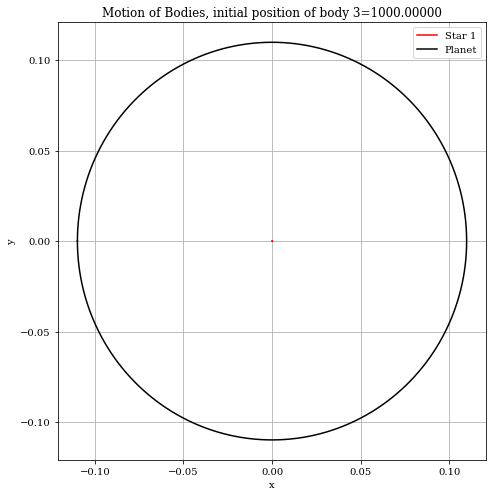

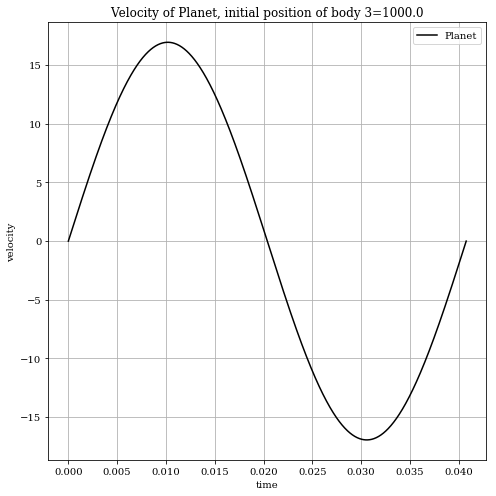

In [4]:
pos3 = 1000
result, tarr = body3(pos3, p=1)
p.plotter(result, 1,1,0, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,0, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,0, pos3, proj=4, tarr=tarr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


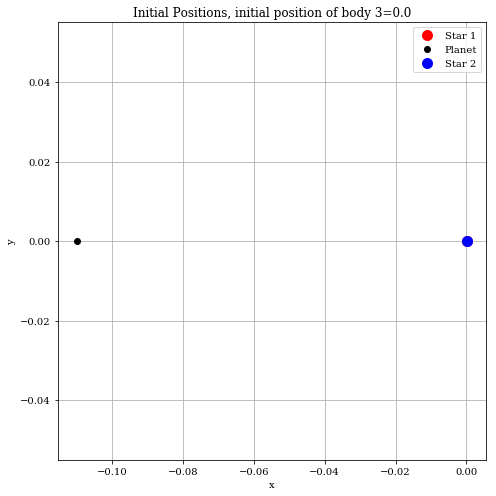

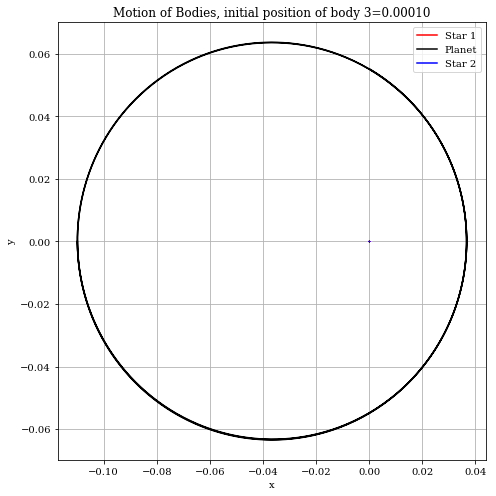

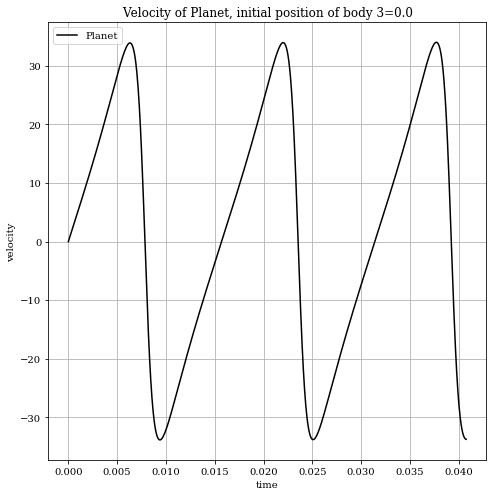

In [5]:
pos3 = a1
result, tarr = body3(pos3, p=1, ϵ=0.001)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


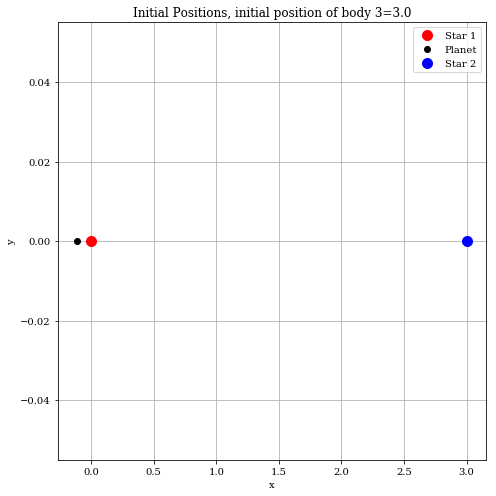

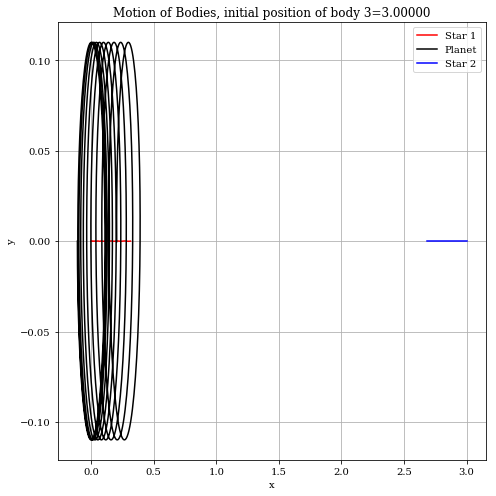

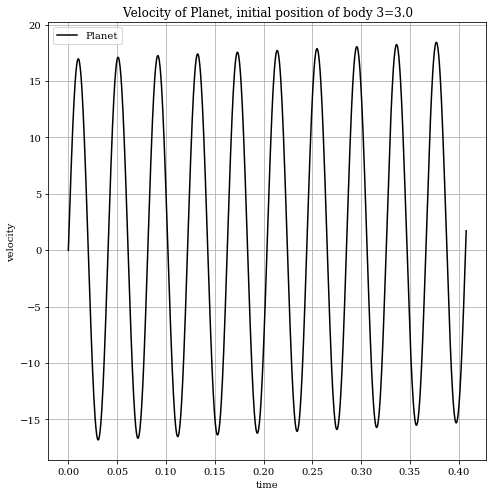

In [17]:
pos3 = 3
result, tarr = body3(pos3, 10)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


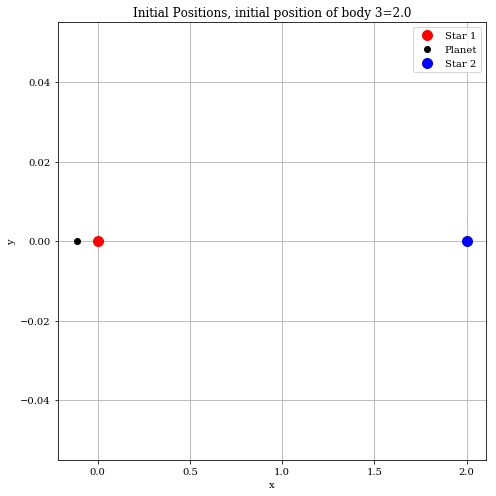

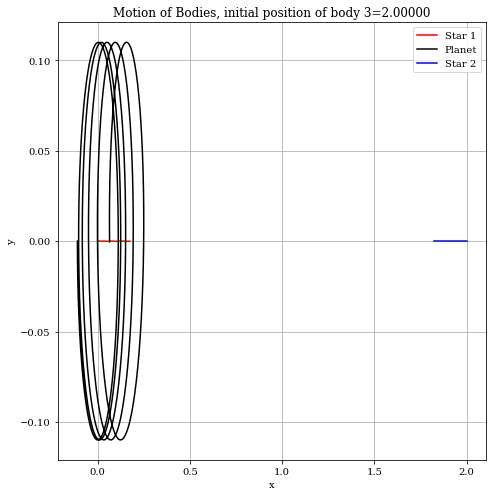

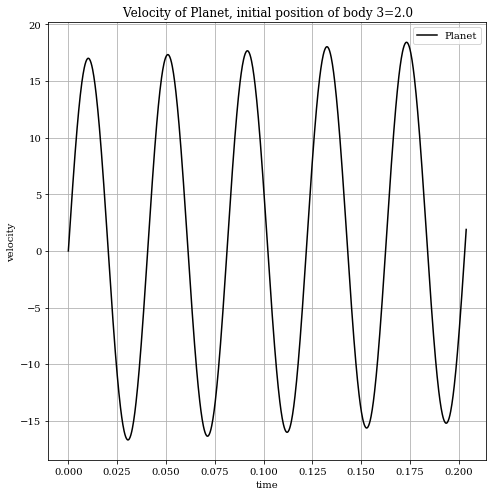

In [18]:
pos3 = 2
result, tarr = body3(pos3, 5)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


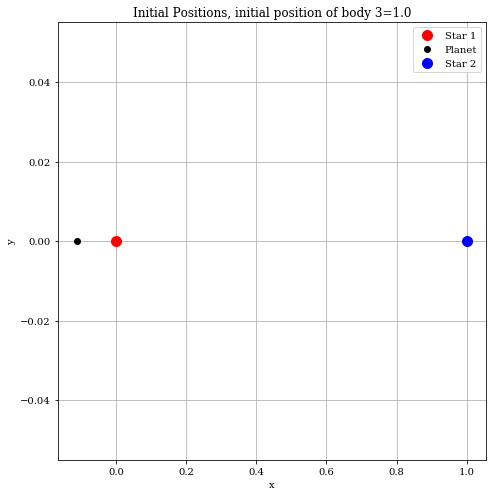

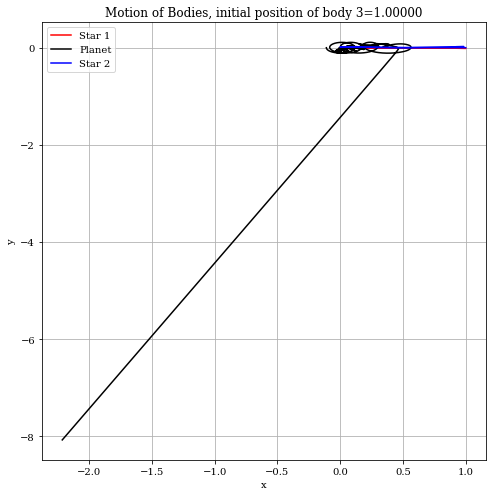

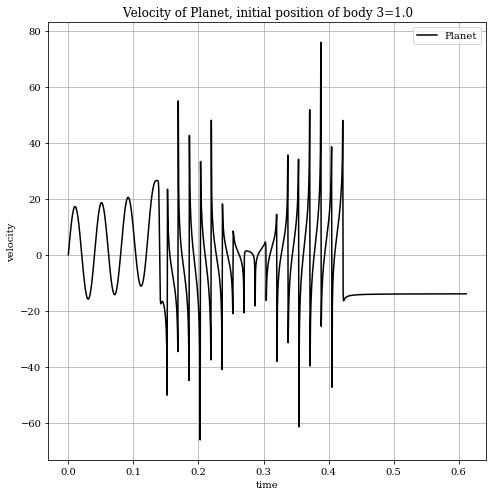

In [21]:
pos3 = 1
result, tarr = body3(pos3, 15)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


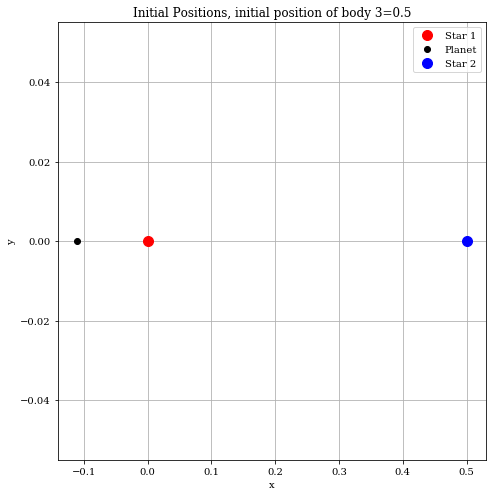

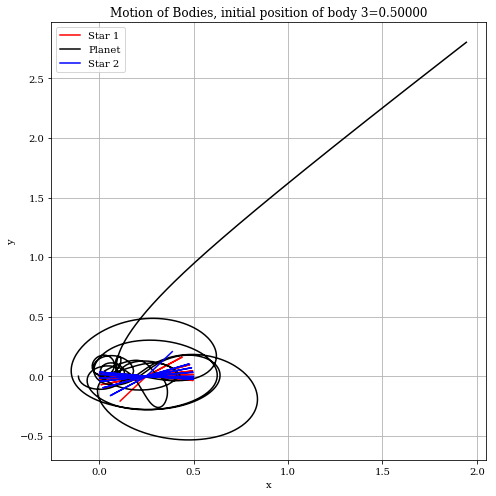

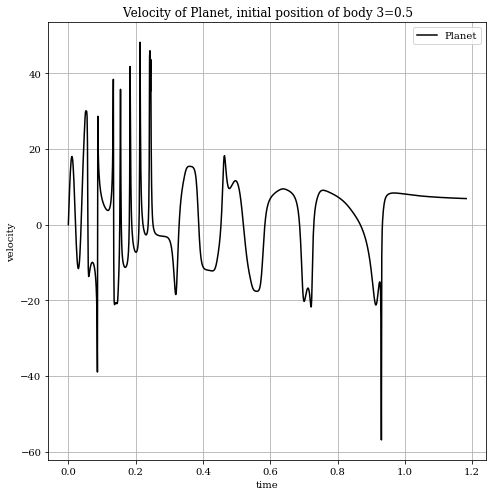

In [39]:
pos3 = 0.5
result, tarr = body3(pos3, 29)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)